In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('QualityPrediction.csv')
df.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

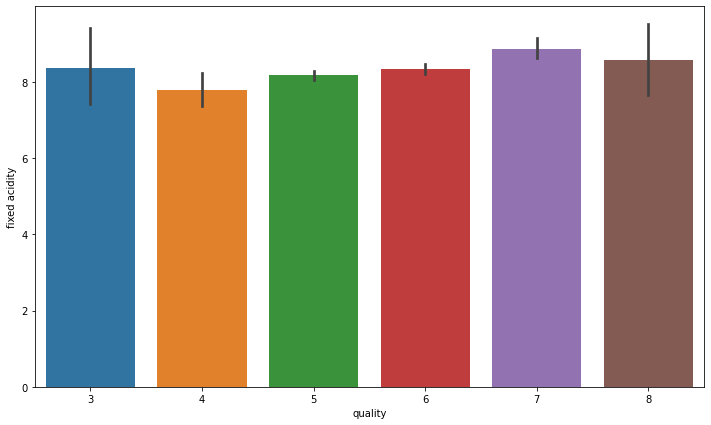

In [11]:
fig = plt.figure(figsize = (12,7))
sns.barplot(x = 'quality', y='fixed acidity', data = df)


<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

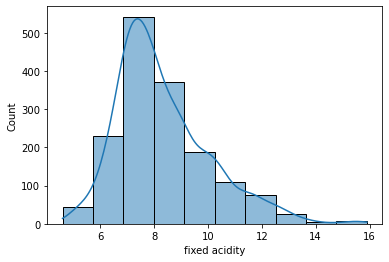

In [17]:
sns.histplot(x = 'fixed acidity', bins = 10, data = df, kde = True)

In [22]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [23]:
le = LabelEncoder()

In [24]:
df['quality'] = le.fit_transform(df['quality'])

In [28]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [29]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 12)

In [32]:
sc = StandardScaler()

In [33]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
X_train


array([[-0.30880165,  0.35380627,  0.29429778, ..., -0.38772674,
        -0.69557817, -0.95076346],
       [ 1.40949297, -0.42983985,  0.29429778, ..., -0.45309758,
         0.29818702,  0.34581493],
       [ 0.32123971, -1.21348597,  1.51891214, ..., -0.32235591,
        -0.75403495, -0.67292523],
       ...,
       [-0.65246057,  0.24185682, -1.13441898, ...,  0.4620941 ,
        -0.34483752, -0.11724878],
       [-0.76701355,  0.91355349, -1.38954698, ...,  0.2659816 ,
        -0.34483752, -0.67292523],
       [ 0.95128107, -1.15751124,  1.62096334, ..., -0.71458091,
         0.70738446, -0.76553797]])

In [37]:
X_test

array([[ 0.43579268,  0.40978099, -1.38954698, ..., -0.84532258,
        -0.16946719, -0.02463604],
       [-0.88156652, -0.3178904 , -0.98134219, ..., -0.06087257,
        -0.05255363, -0.76553797],
       [-0.0796957 ,  1.19342711, -0.93031659, ..., -0.19161424,
        -0.52020784,  1.27194235],
       ...,
       [-1.56888437,  0.74562933, -1.38954698, ...,  2.61933162,
        -0.16946719,  2.19806977],
       [ 1.2376635 ,  0.35380627,  1.11070736, ..., -0.06087257,
        -0.57866462, -0.76553797],
       [ 1.2376635 , -1.60530903,  1.00865616, ..., -1.04143508,
         1.40886577,  0.53104041]])

In [38]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [40]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       420
           1       0.67      0.50      0.57        60

    accuracy                           0.91       480
   macro avg       0.80      0.73      0.76       480
weighted avg       0.90      0.91      0.90       480



In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print(confusion_matrix(y_test, rfc_pred))

[[405  15]
 [ 30  30]]


In [43]:
print(accuracy_score(y_test, rfc_pred))

0.90625


In [44]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [45]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       420
           1       0.35      0.52      0.42        60

    accuracy                           0.82       480
   macro avg       0.64      0.69      0.65       480
weighted avg       0.85      0.82      0.83       480



In [46]:
print(confusion_matrix(y_test, pred_sgd))

[[362  58]
 [ 29  31]]


In [47]:
print(accuracy_score(y_test, pred_sgd))

0.81875


In [49]:

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rfc, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}


In [54]:
rf = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 4, max_features= None)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [55]:
print(accuracy_score(y_test, rf_pred))

0.89375


In [58]:
accuracy_test = cross_val_score(rfc, X_test, y_test, cv = 20)
print(accuracy_test)

[0.875      0.875      0.875      0.875      0.91666667 0.875
 0.91666667 0.875      0.95833333 0.91666667 0.91666667 0.875
 0.95833333 0.875      1.         0.91666667 0.91666667 0.83333333
 0.91666667 0.91666667]
